<a href="https://colab.research.google.com/github/ElMonoSabeTodo/repo-mono-proyect/blob/main/Sesi%C3%B3n_1_PROCEDIMIENTOS_ALMACENADOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

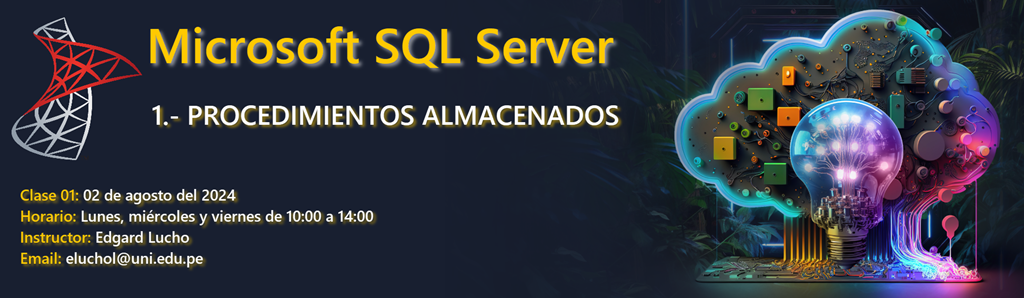

<table width='99%'>
<tr>
<td bgcolor='#52008E'>

# **<font color="#FFFFFF"> ◉ INTRODUCCIÓN A LOS PROCEDIMIENTOS ALMACENADOS</font>**

</td>
</tr>
</table>

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> ◉ ¿Qué son los procedimientos almacenados?</font>**

</td>
</tr>
</table>

Los procedimientos almacenados (stored procedures) en SQL Server son un tipo de objeto de base de datos que encapsula una o más sentencias SQL y otras instrucciones de programación.

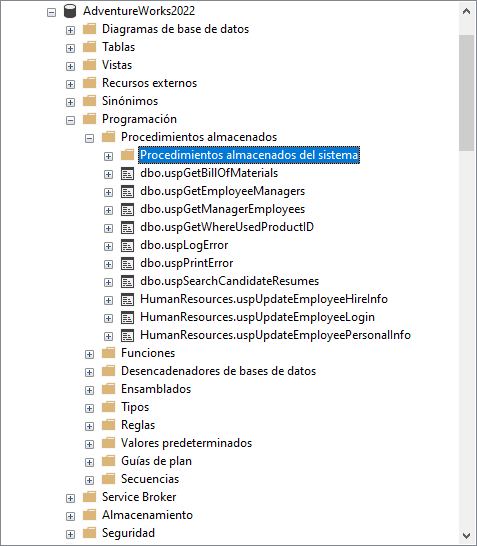

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> ◉ CARACTERÍSTICAS DE LOS PROCEDIMIENTOS ALMACENADOS</font>**

</td>
</tr>
</table>

>* **Reutilización de código**: Los procedimientos almacenados permiten agrupar lógica de acceso a datos en un objeto reutilizable, evitando tener que repetir el mismo código en múltiples lugares.
>* **Mejora en el rendimiento**: Al tener la lógica preconstruida y compilada en el servidor, los procedimientos almacenados a menudo ejecutan más rápido que las consultas ad-hoc.
>* **Seguridad y control de acceso**: Puedes otorgar permisos a usuarios para ejecutar procedimientos almacenados, sin darles acceso directo a las tablas.
>* **Encapsulamiento de lógica de negocio**: Los procedimientos almacenados permiten ocultar la complejidad de la lógica de acceso a datos, exponiendo una interfaz más simple y fácil de usar.
>* **Modularidad y mantenibilidad**: Al separar la lógica en procedimientos almacenados, el código se vuelve más modular y fácil de mantener a largo plazo.

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> ◉ VENTAJAS DE LOS PROCEDIMIENTOS ALMACENADOS</font>**

</td>
</tr>
</table>

>* **Mayor rendimiento**: Los procedimientos almacenados se compilan y se almacenan en el servidor, lo que reduce la sobrecarga de procesamiento en comparación con consultas ad-hoc.
>* **Reutilización de código**: Los procedimientos almacenados permiten encapsular lógica de negocio y reutilizarla en múltiples aplicaciones, lo que mejora la mantenibilidad.
>* **Seguridad y control de acceso**: Puedes otorgar permisos a los usuarios para ejecutar procedimientos almacenados sin darles acceso directo a las tablas, mejorando la seguridad.
>* **Abstracción de la complejidad**: Los procedimientos almacenados permiten ocultar la complejidad de las operaciones de base de datos detrás de una interfaz sencilla y fácil de usar.
>* **Transaccionalidad y manejo de errores**: Puedes incluir lógica de control de transacciones y manejo de errores dentro de los procedimientos almacenados.
>* **Modularidad y mantenibilidad**: Al separar la lógica en procedimientos almacenados, el código se vuelve más modular y fácil de mantener a lo largo del tiempo.

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> ◉ DESVENTAJAS DE LOS PROCEDIMIENTOS ALMACENADOS</font>**

</td>
</tr>
</table>

>* **Complejidad de desarrollo**: La creación y el mantenimiento de procedimientos almacenados pueden ser más complejos que escribir consultas ad-hoc.
>* **Dificultad en el depurado**: Depurar problemas en procedimientos almacenados puede ser más difícil que hacerlo con código de aplicación.
>* **Acoplamiento con el servidor**: Los procedimientos almacenados están estrechamente acoplados al servidor de base de datos, lo que puede dificultar la portabilidad a otros sistemas.
>* **Gestión de versiones**: Actualizar o modificar procedimientos almacenados en producción puede requerir más esfuerzo y coordinación que actualizar código de aplicación.
>* **Escalabilidad limitada**: Los procedimientos almacenados se ejecutan en el servidor de base de datos, lo que puede limitar su escalabilidad en comparación con la ejecución en la capa de aplicación.
>* **Testeo y monitoreo más complejo**: Probar y monitorear el rendimiento de los procedimientos almacenados puede ser más desafiante que hacerlo con consultas ad-hoc.

<table width='99%'>
<tr>
<td bgcolor='#52008E'>

# **<font color="#FFFFFF"> ◉ Creación de procedimientos almacenados básicos</font>**

</td>
</tr>
</table>

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> ◉ Sintaxis básica para crear un procedimiento almacenado</font>**

</td>
</tr>
</table>



```
CREATE PROCEDURE nombre_procedimiento
    [@parametro1 tipo_dato1 [= valor_predeterminado1],
     @parametro2 tipo_dato2 [= valor_predeterminado2],
     ...
     @parametroN tipo_datoN [= valor_predeterminadoN]]
AS
BEGIN
    -- Cuerpo del procedimiento almacenado
    instrucciones_sql
END
```



<table width='99%'>
<tr>
<td bgcolor='#BB2125'>

### **<font color="#FFFFFF"> ◉ Procedimiento almacenado sin parámetros </font>**

</td>
</tr>
</table>



```
-- Procedimiento almacenado sin parámetros
USE Northwind
GO
IF EXISTS
(
	SELECT name
	FROM sys.procedures
	WHERE name = 'usp_customers_consulta'
)
DROP PROCEDURE usp_customers_consulta
GO
CREATE PROCEDURE usp_customers_consulta
AS
BEGIN
	SELECT *
	FROM Customers;
	RETURN 0;
END
GO
```



<table width='99%'>
<tr>
<td bgcolor='#1F9186'>

#### **<font color="#FFFFFF"> ◉ Ejecución</font>**

</td>
</tr>
</table>



```
USE Northwind
GO
EXECUTE usp_customers_consulta
GO
```





```
USE Northwind
GO
EXEC usp_customers_consulta
GO
```





```
USE Northwind
GO
usp_customers_consulta
GO
```



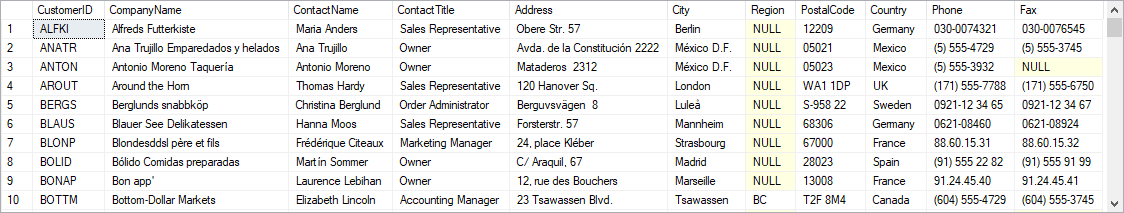

<table width='99%'>
<tr>
<td bgcolor='#52008E'>

# **<font color="#FFFFFF"> ◉ Parámetros de entrada y salida</font>**

</td>
</tr>
</table>

<table width='99%'>
<tr>
<td bgcolor='#1F9186'>

#### **<font color="#FFFFFF"> ◉ ¿Cómo pasar parámetros a los procedimientos almacenados?</font>**

</td>
</tr>
</table>



```
-- Procedimiento almacenado con un parámetro
USE Northwind
GO
IF EXISTS
(
	SELECT name
	FROM sys.procedures
	WHERE name = 'usp_customers_consulta'
)
DROP PROCEDURE usp_customers_consulta
GO
CREATE PROCEDURE usp_customers_consulta
(
	@City nvarchar(15)
)
AS
BEGIN
	SELECT
		CustomerID AS ID,
		CompanyName AS CLIENTE,
		ContactName AS CONTACTO,
		City AS CIUDAD,
		Country AS PAÍS
	FROM Customers
	WHERE City = @City;
	RETURN 0;
END
GO
usp_customers_consulta 'Buenos Aires'
GO
```



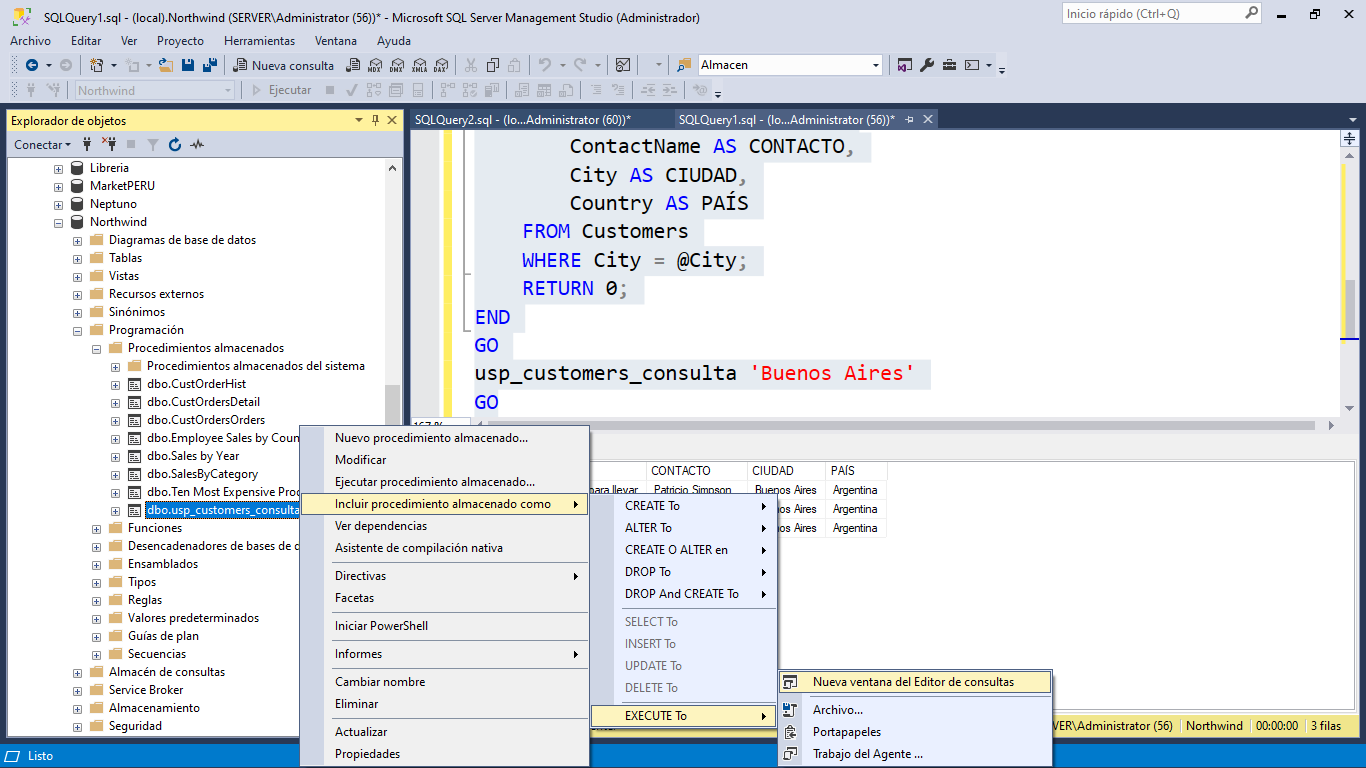



```
USE [Northwind]
GO

DECLARE @RC int
DECLARE @City nvarchar(15) = 'Buenos Aires'

-- TODO: Establezca los valores de los parámetros aquí.

EXECUTE @RC = [dbo].[usp_customers_consulta] @City;
SELECT @RC AS Error

GO
```



<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> ◉ USO DE RETURN</font>**

</td>
</tr>
</table>

En los procedimientos almacenados de SQL Server, la palabra clave RETURN se utiliza para devolver un valor de salida del procedimiento.



```
-- Procedimiento almacenado usando RETURN
USE Northwind
GO
IF EXISTS
(
	SELECT name
	FROM sys.procedures
	WHERE name = 'usp_customers_cnt_x_pais'
)
DROP PROCEDURE usp_customers_cnt_x_pais
GO
CREATE PROCEDURE usp_customers_cnt_x_pais
(
	@Country nvarchar(15)
)
AS
BEGIN
	DECLARE @cnt AS INT=0;

	SELECT @cnt = COUNT(*)
	FROM Customers
	WHERE Country = @Country;

	RETURN @cnt;
END
GO
DECLARE @c AS INT;
EXECUTE @c = usp_customers_cnt_x_pais 'Argentina'
SELECT @c AS [Cantidad de clientes en Argentina]
GO
```





```
-- Procedimiento almacenado usando RETURN
USE Northwind
GO
IF EXISTS
(
	SELECT name
	FROM sys.procedures
	WHERE name = 'usp_customers_cnt_x_pais'
)
DROP PROCEDURE usp_customers_cnt_x_pais
GO
CREATE PROCEDURE usp_customers_cnt_x_pais
(
	@Country nvarchar(15)
)
AS
BEGIN
	DECLARE @cnt AS INT=0;

	SET @cnt =
	(
		SELECT COUNT(*)
		FROM Customers
		WHERE Country = @Country
	)

	RETURN @cnt;
END
GO
DECLARE @c AS INT;
EXECUTE @c = usp_customers_cnt_x_pais 'Argentina'
SELECT @c AS [Cantidad de clientes en Argentina]
GO
```





```
-- Procedimiento almacenado usando RETURN
USE Northwind
GO
IF EXISTS
(
	SELECT name
	FROM sys.procedures
	WHERE name = 'usp_customers_cnt_x_pais'
)
DROP PROCEDURE usp_customers_cnt_x_pais
GO
CREATE PROCEDURE usp_customers_cnt_x_pais
(
	@Country nvarchar(15)
)
AS
BEGIN
	DECLARE @cnt INT =
		(
			SELECT COUNT(*)
			FROM Customers
			WHERE Country = @Country
		)

	RETURN @cnt;
END
GO
DECLARE @c AS INT;
EXECUTE @c = usp_customers_cnt_x_pais 'Argentina'
SELECT @c AS [Cantidad de clientes en Argentina]
GO
```



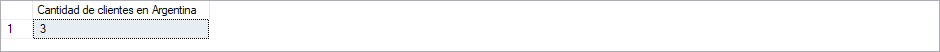

<table width='99%'>
<tr>
<td bgcolor='#1F9186'>

#### **<font color="#FFFFFF"> ◉ Uso de parámetros dinámicos de entrada para filtrar y personalizar la información</font>**

</td>
</tr>
</table>



```
USE pvl
GO
IF EXISTS
(
	SELECT name
	FROM sys.procedures
	WHERE name = 'usp_beneficiario_consulta'
)
DROP PROCEDURE usp_beneficiario_consulta
GO
CREATE PROCEDURE usp_beneficiario_consulta
(
	@parametro varchar(100) = NULL
)
AS
BEGIN
	IF @parametro IS NULL OR LEN(@parametro) = 0
		SELECT TOP 100
			cod_ben_in AS ID,
			pat_ben_vc AS Paterno,
			mat_ben_vc AS Materno,
			nom_ben_vc AS Nombres,
			dni_ben_ch AS DNI,
			CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [Fecha de Nacimiento],
			CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, '20040731')/365.256363004) AS Edad,
			IIF(cod_sex_bi=0, 'FEMENINO', 'MASCULINO') AS Sexo
		FROM Beneficiario
	ELSE
	IF ISNUMERIC(@parametro) = 1 AND LEN(@parametro) != 8
	BEGIN
		SELECT
			cod_ben_in AS ID,
			pat_ben_vc AS Paterno,
			mat_ben_vc AS Materno,
			nom_ben_vc AS Nombres,
			dni_ben_ch AS DNI,
			CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [Fecha de Nacimiento],
			CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, '20040731')/365.256363004) AS Edad,
			IIF(cod_sex_bi=0, 'FEMENINO', 'MASCULINO') AS Sexo
		FROM Beneficiario
		WHERE cod_ben_in = @parametro
	END
	ELSE
	IF @parametro LIKE ('[0-9][0-9][0-9][0-9][0-9][0-9][0-9][0-9]')
	BEGIN
		SELECT
			cod_ben_in AS ID,
			pat_ben_vc AS Paterno,
			mat_ben_vc AS Materno,
			nom_ben_vc AS Nombres,
			dni_ben_ch AS DNI,
			CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [Fecha de Nacimiento],
			CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, '20040731')/365.256363004) AS Edad,
			IIF(cod_sex_bi=0, 'FEMENINO', 'MASCULINO') AS Sexo
		FROM Beneficiario
		WHERE dni_ben_ch = @parametro
	END
	ELSE
	IF @parametro LIKE ('[0-9][0-9]/[0-9][0-9]/[0-9][0-9][0-9][0-9]')
	BEGIN
		SELECT
			cod_ben_in AS ID,
			pat_ben_vc AS Paterno,
			mat_ben_vc AS Materno,
			nom_ben_vc AS Nombres,
			dni_ben_ch AS DNI,
			CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [Fecha de Nacimiento],
			CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, '20040731')/365.256363004) AS Edad,
			IIF(cod_sex_bi=0, 'FEMENINO', 'MASCULINO') AS Sexo
		FROM Beneficiario
		WHERE fec_nac_ben_da = CONVERT(DATE, @parametro, 103)
	END
	ELSE
	IF @parametro = 'MASCULINO' OR @parametro = 'FEMENINO'
	BEGIN
		SELECT
			cod_ben_in AS ID,
			pat_ben_vc AS Paterno,
			mat_ben_vc AS Materno,
			nom_ben_vc AS Nombres,
			dni_ben_ch AS DNI,
			CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [Fecha de Nacimiento],
			CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, '20040731')/365.256363004) AS Edad,
			IIF(cod_sex_bi=0, 'FEMENINO', 'MASCULINO') AS Sexo
		FROM Beneficiario
		WHERE IIF(cod_sex_bi=0, 'FEMENINO', 'MASCULINO') = @parametro
	END
	ELSE
		SELECT
			cod_ben_in AS ID,
			pat_ben_vc AS Paterno,
			mat_ben_vc AS Materno,
			nom_ben_vc AS Nombres,
			dni_ben_ch AS DNI,
			CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [Fecha de Nacimiento],
			CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, '20040731')/365.256363004) AS Edad,
			IIF(cod_sex_bi=0, 'FEMENINO', 'MASCULINO') AS Sexo
		FROM Beneficiario
		WHERE pat_ben_vc + ' ' + mat_ben_vc + ' ' + nom_ben_vc LIKE @parametro + '%'
	RETURN 0
END
GO
usp_beneficiario_consulta  'cruz quispe'
GO
```



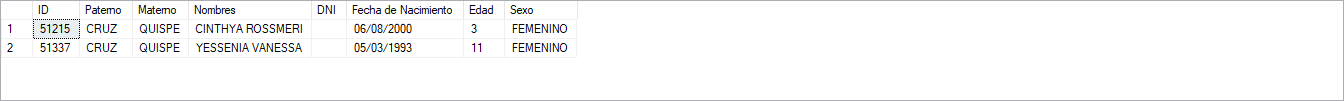

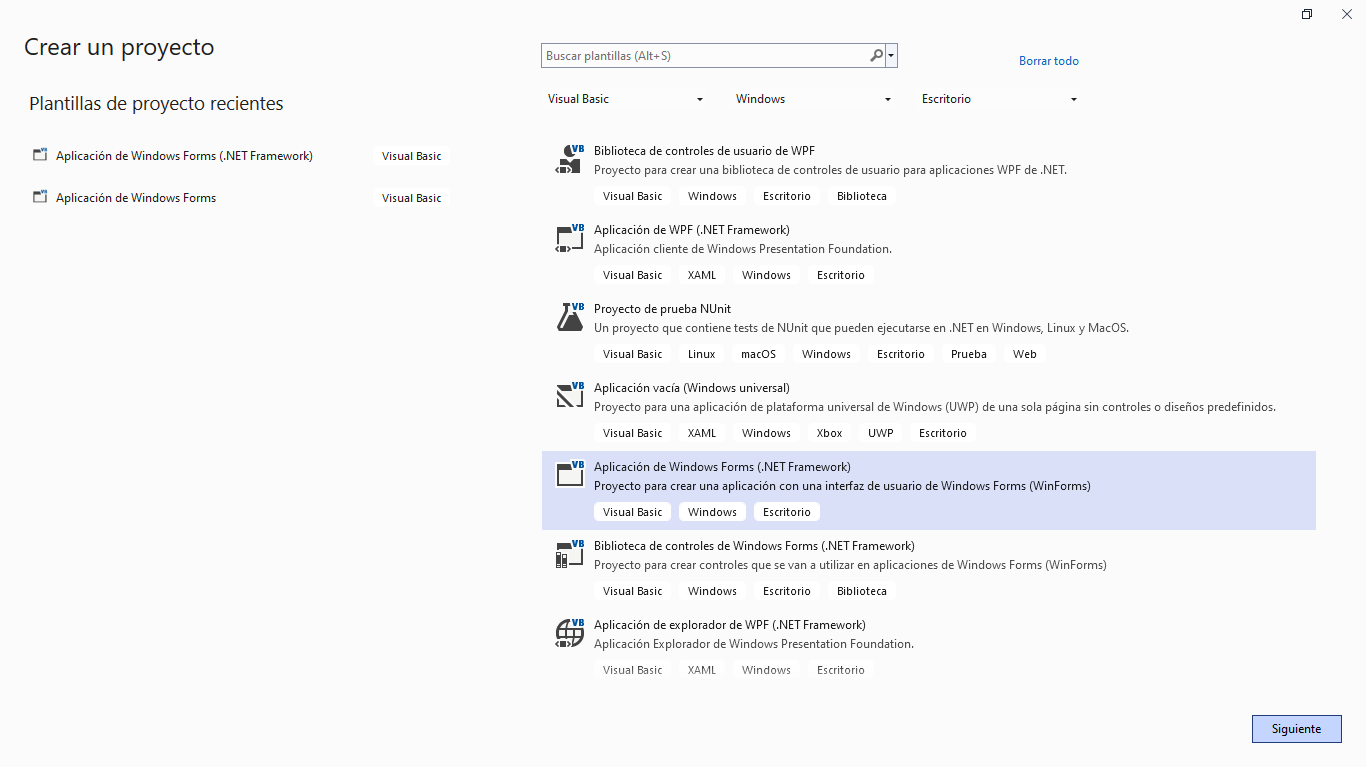



```
Imports System.Data
Imports System.Data.SqlClient

Public Class FrmPrincipal
    Private objSqlConnection As SqlConnection
    Private objSqlCommand As SqlCommand


    Private Sub FrmPrincipal_Load(sender As Object, e As EventArgs) Handles MyBase.Load
        Buscar()
    End Sub
    Private Sub Buscar()
        objSqlConnection = New SqlConnection
        With objSqlConnection
            .ConnectionString = "Data Source=.;Initial Catalog=pvl;Integrated Security=True;"
            .Open()
        End With
        Dim objSqlParameter As New SqlParameter("@parametro", Me.txtBuscar.Text().Trim())
        objSqlCommand = New SqlCommand()
        With objSqlCommand
            .Connection = objSqlConnection
            .CommandType = CommandType.StoredProcedure
            .CommandText = "usp_beneficiario_consulta"
            .Parameters.Add(objSqlParameter)
            .ExecuteNonQuery()
        End With
        Dim objSqlDataAdapter As New SqlDataAdapter(objSqlCommand)
        Dim objDataTable As New DataTable
        objSqlDataAdapter.Fill(objDataTable)

        With Me.dgvBeneficiario
            .DataSource = objDataTable
            .AllowDrop = False
            .AllowUserToAddRows = False
            .AllowUserToDeleteRows = False
            .AllowUserToOrderColumns = False
            .AllowUserToResizeColumns = False
            .AllowUserToResizeRows = False
            .EditMode = DataGridViewEditMode.EditProgrammatically

        End With
    End Sub

    Private Sub txtBuscar_TextChanged(sender As Object, e As EventArgs) Handles txtBuscar.TextChanged
        Buscar()
    End Sub
End Class
```



<table width='99%'>
<tr>
<td bgcolor='#1F9186'>

#### **<font color="#FFFFFF"> ◉ Procedimientos almacenados con más de un parámetro</font>**

</td>
</tr>
</table>



```
/*
En caso necesite listar por sexo de una cierta edad y
su apellido empiece por cierta letra
*/

USE pvl
GO
IF EXISTS
(
	SELECT name
	FROM sys.procedures
	WHERE name = 'usp_beneficiario_consulta_x_apellido_x_edad_sexo'
)
DROP PROCEDURE usp_beneficiario_consulta_x_apellido_x_edad_sexo
GO
CREATE PROCEDURE usp_beneficiario_consulta_x_apellido_x_edad_sexo
(
	@beneficiario VARCHAR(100),
	@edad INT,
	@sexo VARCHAR(9)
)
AS
BEGIN
	SELECT
        cod_ben_in AS ID,
        pat_ben_vc AS Paterno,
        mat_ben_vc AS Materno,
        nom_ben_vc AS Nombres,
        dni_ben_ch AS DNI,
        CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [Fecha de Nacimiento],
        CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, '20040731')/365.256363004) AS Edad,
        IIF(cod_sex_bi=0, 'FEMENINO', 'MASCULINO') AS Sexo
    FROM Beneficiario
	WHERE
			pat_ben_vc + ' ' + mat_ben_vc + ' ' + nom_ben_vc LIKE @beneficiario + '%'
		AND
			CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, '20040731')/365.256363004) = @edad
		AND
			IIF(cod_sex_bi=0, 'FEMENINO', 'MASCULINO') = @sexo

	RETURN 0
END
GO

DECLARE @RC int
DECLARE @beneficiario varchar(100) = 'p'
DECLARE @edad int = 18
DECLARE @sexo varchar(9) = 'FEMENINO'

-- TODO: Establezca los valores de los parámetros aquí.

EXECUTE @RC = [dbo].[usp_beneficiario_consulta_x_apellido_x_edad_sexo]
   @beneficiario
  ,@edad
  ,@sexo
GO
```



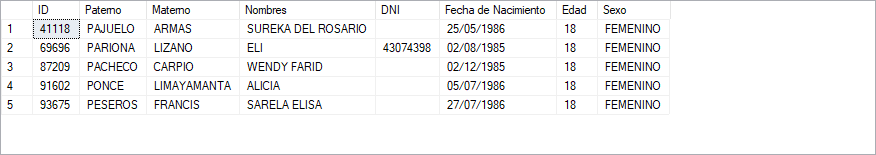

<table width='99%'>
<tr>
<td bgcolor='#1F9186'>

#### **<font color="#FFFFFF"> ◉ ¿Cómo devolver valores de salida desde los procedimientos almacenados?</font>**

</td>
</tr>
</table>



```
-- Calcular los montos de ventas por año
-- Parámetro de entrada: Año
-- Parámetro de salida: Monto
USE Northwind
GO
IF EXISTS
(
	SELECT name
	FROM sys.procedures
	WHERE name = 'usp_orders_consulta_x_monto_x_year'
)
DROP PROCEDURE usp_orders_consulta_x_monto_x_year
GO
CREATE PROCEDURE usp_orders_consulta_x_monto_x_year
(
	@year	INT,
	@monto	DECIMAL(19,2) OUTPUT
)
AS
BEGIN

	SELECT @monto = SUM(od.Quantity * od.UnitPrice*(1 - od.Discount))
	FROM Orders o
	INNER JOIN [Order Details] od
	ON o.OrderID = od.OrderID
	WHERE YEAR(o.OrderDate) = @year;

	RETURN 0
END
GO
DECLARE @m DECIMAL(19,2)
DECLARE @error INT
EXECUTE @error = usp_orders_consulta_x_monto_x_year 1998, @m OUTPUT
SELECT @m AS Monto
SELECT @error AS Error

```



<table width='99%'>
<tr>
<td bgcolor='#52008E'>

# **<font color="#FFFFFF"> ◉ Condicionales y bucles en procedimientos almacenados</font>**

</td>
</tr>
</table>

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> ◉ Utilización de declaraciones IIF para tomar decisiones.</font>**

</td>
</tr>
</table>



```
-- Calcular los montos de ventas por año
-- Parámetro de entrada: Año
-- Parámetro de salida: Monto
USE pvl
GO
SELECT
        cod_ben_in AS ID,
        pat_ben_vc AS Paterno,
        mat_ben_vc AS Materno,
        nom_ben_vc AS Nombres,
        dni_ben_ch AS DNI,
        CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [Fecha de Nacimiento],
        IIF(CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, '20040731')/365.256363004) BETWEEN 0 AND 13, 'NIÑO',
		IIF(CONVERT(INT, DATEDIFF(DAY, fec_emb_ben_da, '20040731'))/7 BETWEEN 0 AND 42, 'MADRE GESTANTE',
		IIF(CONVERT(INT, DATEDIFF(DAY, fec_lac_ben_da, '20040731')/365.256363004) = 0, 'MADRE LACTANTE',
		IIF(
			(CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, '20040731')/365.256363004) >= 60 AND cod_sex_bi=0)
			OR
			(CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, '20040731')/365.256363004) >= 65 AND cod_sex_bi=1)
			, 'ANCIANO', 'OTRO')))) AS 'Tipo de Beneficiario',
        IIF(cod_sex_bi=0, 'FEMENINO', 'MASCULINO') AS Sexo
    FROM Beneficiario
```



<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> ◉ Uso de bucles WHILE y CURSOR para procesar conjuntos de datos</font>**

</td>
</tr>
</table>

<table width='99%'>
<tr>
<td bgcolor='#1F9186'>

#### **<font color="#FFFFFF"> ◉ Sintaxis </font>**

</td>
</tr>
</table>



```
CREATE PROCEDURE nombre_procedimiento
    [@parametro1 tipo_dato1, ...]
AS
BEGIN
    -- Inicialización de variables
    DECLARE @variable1 tipo_dato1, @variable2 tipo_dato2, ...

    -- Condición de ejecución del bucle
    WHILE condición
    BEGIN
        -- Cuerpo del bucle
        instrucciones_sql

        -- Actualización de variables
        SET @variable1 = nuevo_valor1
        SET @variable2 = nuevo_valor2
    END

    -- Instrucciones finales
    instrucciones_sql
END
```





```
DECLARE @cnt INT = 1
DECLARE @n INT = 5

WHILE @cnt <= @n
BEGIN
	PRINT @cnt
	SET @cnt = @cnt + 1
END
```



<table width='99%'>
<tr>
<td bgcolor='#BB2125'>

### **<font color="#FFFFFF"> ◉ Cursor </font>**

</td>
</tr>
</table>

Un cursor en SQL Server es una estructura de datos que permite procesar y recorrer los registros de un resultado de consulta de una manera controlada y secuencial. Los cursores se utilizan cuando se necesita procesar los registros de una consulta de manera individual, en lugar de trabajar con el conjunto de resultados completo.

<table width='99%'>
<tr>
<td bgcolor='#1F9186'>

#### **<font color="#FFFFFF"> ◉ Sintaxis </font>**

</td>
</tr>
</table>



```
-- Declarar el cursor
DECLARE @cursor CURSOR
FOR
    SELECT_statement

-- Abrir el cursor
OPEN @cursor

-- Procesar los registros del cursor
FETCH NEXT FROM @cursor INTO @variables

WHILE @@FETCH_STATUS = 0
BEGIN
    -- Realizar operaciones con los valores de las variables
    instrucciones_sql

    -- Obtener el siguiente registro
    FETCH NEXT FROM @cursor INTO @variables
END

-- Cerrar y liberar el cursor
CLOSE @cursor
DEALLOCATE @cursor
```





```
USE Northwind
GO
IF EXISTS
(
	SELECT name
	FROM sys.procedures
	WHERE name = 'usp_venta'
)
DROP PROCEDURE usp_venta
GO
CREATE PROCEDURE usp_venta
(
	@OrderID INT
)
AS
BEGIN
	SET NOCOUNT ON;

	DECLARE @CompanyName	nvarchar(40)
	DECLARE @Address		nvarchar(60)
	DECLARE @Fecha			char(10)


	DECLARE ucr_venta CURSOR
	FOR
	SELECT
		o.OrderID,
		c.CompanyName,
		c.Address,
		CONVERT(CHAR(10), o.OrderDate, 103) AS Fecha
	FROM [dbo].[Customers] c
	INNER JOIN [dbo].[Orders] o
	ON c.CustomerID = o.CustomerID
	WHERE o.OrderID = @OrderID;

	OPEN ucr_venta;

	FETCH NEXT FROM ucr_venta
	INTO
		@OrderID,
		@CompanyName,
		@Address,
		@Fecha;

	WHILE @@FETCH_STATUS = 0
	BEGIN
		PRINT CONCAT(SPACE(50),'FACTURA E-',RIGHT('0000000'+LTRIM(@OrderID),7));
		PRINT '';
		PRINT CONCAT(SPACE(2),'CLIENTE: ', @CompanyName);
		PRINT CONCAT(SPACE(2),'DIRECCIÓN: ', @Address);
		PRINT REPLICATE('-', 80)

		FETCH NEXT FROM ucr_venta
		INTO
			@OrderID,
			@CompanyName,
			@Address,
			@Fecha;
	END


	CLOSE ucr_venta;
	DEALLOCATE ucr_venta;

	RETURN 0
END
GO
EXECUTE usp_venta 10248
GO
```





```
USE Northwind
GO
IF EXISTS
(
	SELECT name
	FROM sys.procedures
	WHERE name = 'usp_venta'
)
DROP PROCEDURE usp_venta
GO
CREATE PROCEDURE usp_venta
(
	@OrderID INT
)
AS
BEGIN
	SET NOCOUNT ON;

	DECLARE @CompanyName	nvarchar(40)
	DECLARE @Address		nvarchar(60)
	DECLARE @Fecha			char(10)

	DECLARE @ProductID		int
	DECLARE @ProductName	nvarchar(40)
	DECLARE @UnitPrice		money
	DECLARE @Quantity		smallint
	DECLARE @Discount		real
	DECLARE @SubTotal		real



	DECLARE ucr_venta CURSOR
	FOR
	SELECT
		o.OrderID,
		c.CompanyName,
		c.Address,
		CONVERT(CHAR(10), o.OrderDate, 103) AS Fecha
	FROM [dbo].[Customers] c
	INNER JOIN [dbo].[Orders] o
	ON c.CustomerID = o.CustomerID
	WHERE o.OrderID = @OrderID;

	OPEN ucr_venta;

	FETCH NEXT FROM ucr_venta
	INTO
		@OrderID,
		@CompanyName,
		@Address,
		@Fecha;

	WHILE @@FETCH_STATUS = 0
	BEGIN
		PRINT CONCAT(SPACE(50),'FACTURA E-',RIGHT('0000000'+LTRIM(@OrderID),7));
		PRINT '';
		PRINT CONCAT(SPACE(2),'CLIENTE: ', @CompanyName);
		PRINT CONCAT(SPACE(2),'DIRECCIÓN: ', @Address);
		PRINT REPLICATE('-', 70)

		--=========================================================
		DECLARE ucr_venta_detalle CURSOR
		FOR
		SELECT
			p.ProductID,
			p.ProductName,
			od.UnitPrice,
			od.Quantity,
			od.Discount,
			od.Quantity*od.UnitPrice * (1-od.Discount) AS SubTotal
		FROM Products p
		INNER JOIN [Order Details] od
		ON p.ProductID = od.ProductID
		WHERE od.OrderID = @OrderID
		OPEN ucr_venta_detalle;

		FETCH NEXT FROM ucr_venta_detalle
		INTO
			@ProductID,
			@ProductName,
			@UnitPrice,
			@Quantity,
			@Discount,
			@SubTotal;
		DECLARE @cnt INT = 1
		WHILE @@FETCH_STATUS = 0
		BEGIN
			PRINT CONCAT(RIGHT('00'+LTRIM(@cnt),2), SPACE(1), RIGHT('000'+LTRIM(@ProductID),3), SPACE(2), @ProductName)

			SET @cnt += 1
			FETCH NEXT FROM ucr_venta_detalle
			INTO
				@ProductID,
				@ProductName,
				@UnitPrice,
				@Quantity,
				@Discount,
				@SubTotal;
		END
		PRINT REPLICATE('-', 70)
		CLOSE ucr_venta_detalle;
		DEALLOCATE ucr_venta_detalle;
		--=========================================================
		FETCH NEXT FROM ucr_venta
		INTO
			@OrderID,
			@CompanyName,
			@Address,
			@Fecha;
	END


	CLOSE ucr_venta;
	DEALLOCATE ucr_venta;

	RETURN 0
END
GO
EXECUTE usp_venta 10248
GO
```



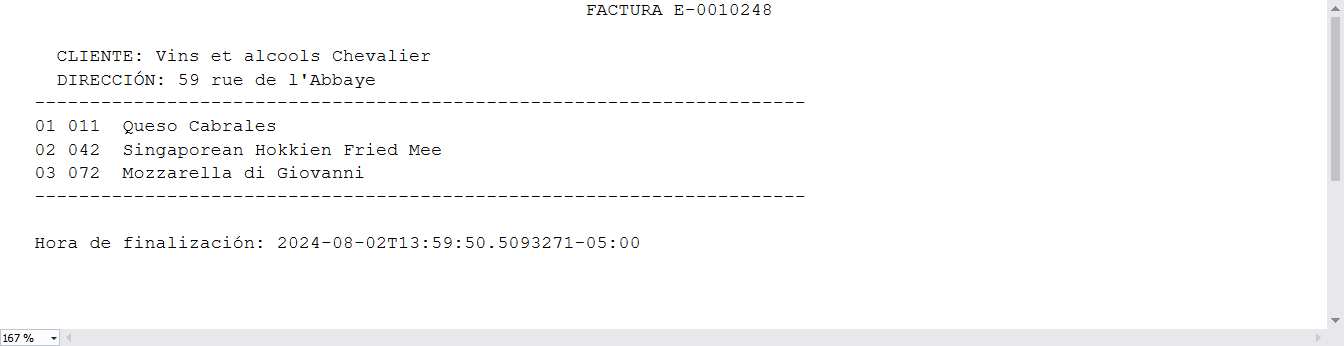